In [65]:
import pandas as pd
import numpy as np
%matplotlib inline

In [66]:
from pathlib import Path
csvpath = Path('./Resources/berkshire_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2018-06-29,NaN,NaN,NaN,NaN
2018-07-02,1.002766,1.003619,1.003619,NaN
2018-07-03,0.998673,0.996927,0.996927,NaN
2018-07-05,1.007006,1.005320,1.005320,NaN
2018-07-06,1.015414,1.011935,1.011935,NaN


In [67]:
df = df.iloc[1:]
df.head()

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2018-07-02,1.002766,1.003619,1.003619,NaN
2018-07-03,0.998673,0.996927,0.996927,NaN
2018-07-05,1.007006,1.005320,1.005320,NaN
2018-07-06,1.015414,1.011935,1.011935,NaN
2018-07-09,1.024706,1.024373,1.024373,NaN


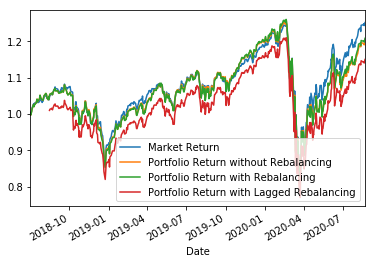

In [68]:
df.plot()

In [69]:
# dropping out two columns
data_df = df.drop(columns=['Portfolio Return without Rebalancing', 'Portfolio Return with Lagged Rebalancing'])
data_df.head(2)

,Market Return,Portfolio Return with Rebalancing
Date,,
2018-07-02,1.002766,1.003619
2018-07-03,0.998673,0.996927


In [70]:
data_df["Actual"] = data_df["Portfolio Return with Rebalancing"].shift(-1)
data_df.dropna()
data_df.head()

,Market Return,Portfolio Return with Rebalancing,Actual
Date,,,
2018-07-02,1.002766,1.003619,0.996927
2018-07-03,0.998673,0.996927,1.005320
2018-07-05,1.007006,1.005320,1.011935
2018-07-06,1.015414,1.011935,1.024373
2018-07-09,1.024706,1.024373,1.026147


In [71]:
X = data_df["Portfolio Return with Rebalancing"]
y = data_df["Actual"]

In [72]:
# Determine features and targets
# X = np.array(data_df["Portfolio Return with Rebalancing"]).reshape(-1,1)
# y = np.array(data_df["Actual"]).reshape(-1,1)

In [73]:
# Manually splitting the data
split = int(0.8*len(X))
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [74]:
print(f'total X size:{len(X)}')
print(f'X_train size:{len(X_train)}')
print(f'X_test size:{len(X_test)}')
print(f'y_train size:{len(y_train)}')
print(f'y_test size:{len(y_test)}')

total X size:538
X_train size:430
X_test size:108
y_train size:430
y_test size:108


In [10]:
# # Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Fit the MinMaxScaler object with the features data X
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# # Fit the MinMaxScaler object with the target data Y
# scaler_out =MinMaxScaler()
# scaler_out.fit(y_train)
# y_train = scaler_out.transform(y_train)
# y_test = scaler_out.transform(y_test)

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


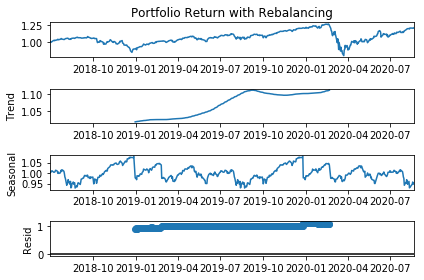

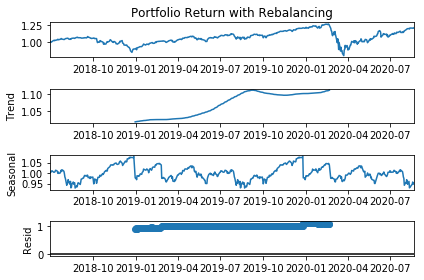

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data_df["Portfolio Return with Rebalancing"], model='multiplicative',freq=250);
decomposed.plot()

### Augmented Dickey-Fuller Test

In [76]:
from statsmodels.tsa.stattools import adfuller
adfuller(data_df["Portfolio Return with Rebalancing"])

(-2.447300951960143,
 0.12882850558332004,
 9,
 528,
 {'1%': -3.4427957890025533,
  '5%': -2.867029512430173,
  '10%': -2.5696937122646926},
 -2834.4495662864274)

P-value is more than 0.05 indicating the data is non-statinary

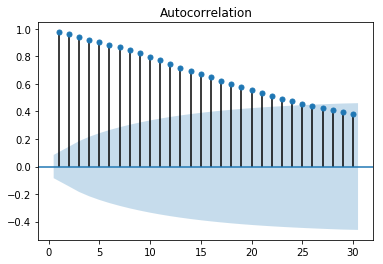

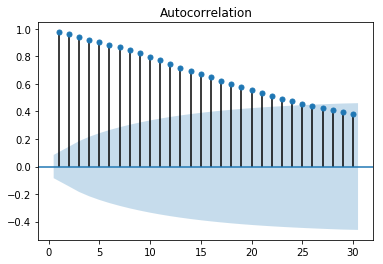

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the autocorrelation of the Settle Prices
plot_acf(data_df["Portfolio Return with Rebalancing"], zero=False, lags=30)

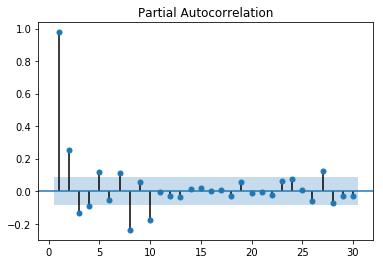

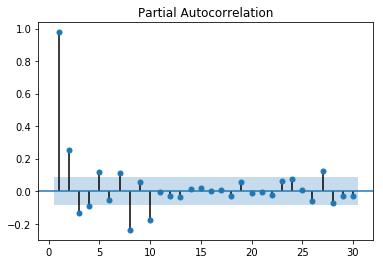

In [78]:
# Plot the partial autocorrelation of the returns
plot_pacf(data_df["Portfolio Return with Rebalancing"], zero=False, lags=30)

In [79]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(y_train, 
 exogenous= X_train,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

ValueError: Expected 2D array, got 1D array instead:
array=[1.00361943 0.99692738 1.00532044 1.01193498 1.02437317 1.02614738
 1.02061004 1.02692149 1.02641148 1.03158332 1.03613355 1.04116129
 1.03364314 1.03525605 1.04052128 1.04438641 1.05185456 1.04762433
 1.0435385  1.03868307 1.03895377 1.03809027 1.04380291 1.04996665
 1.05431028 1.0566311  1.0565495  1.05361688 1.04489261 1.03954158
 1.04719773 1.04106389 1.05165176 1.05497308 1.0565498  1.0577754
 1.05594669 1.05330157 1.05806571 1.06767947 1.06702747 1.07019669
 1.06443895 1.06368755 1.06431515 1.06294684 1.05904341 1.0573436
 1.05895881 1.06142443 1.05925471 1.06208473 1.06452635 1.06008862
 1.06364785 1.07050629 1.08050856 1.07329471 1.06586826 1.06258944
 1.0565145  1.0565482  1.05218107 1.05572889 1.056593   1.05985462
 1.0565636  1.05018065 1.05218267 1.05043715 1.01658042 0.99316535
 1.00395903 0.99845629 1.01786753 1.02146825 1.00692855 1.01160758
 1.00293312 0.99804569 0.9712257  0.98891472 0.97249321 0.97233391
 0.98800132 0.99971    1.00750555 1.00113071 1.00996977 1.01572501
 1.03257313 1.03377084 1.02458187 1.00357253 1.00545224 0.99506587
 1.00832046 1.00899466 0.99615397 0.97621943 0.97786615 0.9716329
 0.98789942 0.99061673 1.01161588 1.00585794 1.01332019 1.02254016
 0.9857326  0.98046586 0.95858011 0.9565973  0.95431028 0.95875631
 0.9575885  0.9425635  0.92643339 0.92496377 0.91151028 0.89905489
 0.87483982 0.85267507 0.89259395 0.90093351 0.8999854  0.90409013
 0.91079078 0.89042983 0.91868863 0.92321966 0.92783709 0.93102882
 0.93474484 0.93494134 0.93551205 0.94384711 0.95309167 0.95866281
 0.97259371 0.95797591 0.96312094 0.96517646 0.97227601 0.96746137
 0.96468475 0.97630843 0.98284988 0.98394969 0.99112244 0.99365356
 0.99283255 0.98299048 0.98225218 0.985396   0.99825329 1.00098151
 0.99430686 1.00731735 1.00982917 1.01274289 1.01023337 1.01222989
 1.0144966  1.0137962  1.0149519  1.01351139 1.01832253 1.0140985
 1.01141038 1.00588234 0.99685038 0.99621097 1.00972867 1.01186938
 1.01900823 1.02050374 1.02277936 1.0291346  1.02627678 1.0149051
 1.02329036 1.00182631 0.9998372  1.00860566 1.00414763 1.01051487
 1.01615301 1.03263443 1.03227723 1.03520845 1.03839477 1.04103339
 1.0432182  1.03673556 1.04117289 1.04387951 1.0564699  1.05416398
 1.06229614 1.06523466 1.06564356 1.06488315 1.0718869  1.0711414
 1.0707293  1.07686414 1.08243328 1.08453669 1.07663234 1.07590473
 1.0852339  1.07922965 1.06096993 1.05893361 1.05619709 1.06199403
 1.03250683 1.0421479  1.04509902 1.05530219 1.04857414 1.0434046
 1.05177316 1.04798094 1.03443784 1.03804957 1.0280827  1.02393067
 1.02467997 1.00954057 1.00948797 1.03468074 1.04398531 1.05071185
 1.0576797  1.06481185 1.06529386 1.05937412 1.06301674 1.06183003
 1.0575691  1.06926018 1.06990679 1.07907555 1.07058809 1.06962919
 1.06127813 1.06090373 1.06673187 1.07453952 1.0862632  1.08786572
 1.09635327 1.09670318 1.09114314 1.09266445 1.09426666 1.09889439
 1.10605564 1.10451383 1.1006356  1.09339115 1.10077481 1.09519937
 1.09869429 1.10840596 1.11511701 1.10958787 1.11941734 1.11518421
 1.11275199 1.10145681 1.0856318  1.07961406 1.04383931 1.05904311
 1.0565984  1.07626573 1.06955549 1.05373138 1.07009729 1.03696096
 1.04069338 1.05826451 1.07069459 1.05977852 1.06669627 1.06957229
 1.042257   1.05434448 1.04946195 1.0570316  1.0711946  1.07252971
 1.06398205 1.07695454 1.09348435 1.09413886 1.0997932  1.0995943
 1.10699535 1.11214669 1.11355569 1.10855066 1.11116308 1.1136717
 1.11139628 1.09872619 1.10106431 1.09305695 1.10086881 1.0995974
 1.09640387 1.0993939  1.08332388 1.06228374 1.06922588 1.08719561
 1.08168717 1.06316944 1.07423822 1.08274988 1.09440716 1.09426216
 1.10479533 1.10197431 1.10347922 1.10083061 1.11247149 1.10728245
 1.11057787 1.114332   1.12007754 1.12709919 1.12560818 1.1278801
 1.12415957 1.13677536 1.1425979  1.14512742 1.14771403 1.15386388
 1.15592079 1.15396318 1.15593979 1.15450488 1.15528379 1.16093073
 1.16356154 1.16460005 1.15957252 1.1568515  1.16047912 1.16987259
 1.1711229  1.17599093 1.17336811 1.16465015 1.15302547 1.16124423
 1.16525156 1.17746274 1.17446692 1.17358032 1.17536923 1.19045563
 1.19049583 1.19694658 1.19847629 1.19568567 1.1996229  1.19798259
 1.19782268 1.19835559 1.20506294 1.20470273 1.19903249 1.20104131
 1.21325969 1.20253022 1.20462403 1.1994059  1.20735025 1.21726102
 1.21178848 1.22242816 1.21909333 1.21825343 1.2291955  1.23441514
 1.22959201 1.23223863 1.23290793 1.22142825 1.20145231 1.21586371
 1.21523691 1.22634548 1.20093181 1.20992117 1.2282095  1.24376191
 1.24764213 1.24200349 1.24994835 1.25060915 1.25642489 1.25596729
 1.25856151 1.25200786 1.26047962 1.25525209 1.24009668 1.19806719
 1.16124003 1.1577019  1.10444693 1.09255255 1.14668413 1.10864816
 1.15239237 1.10952677 1.08396069 0.99203484 1.04818984 0.99457156
 0.89432296 0.99591757 0.8716576  0.92639508].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  430
Model:               SARIMAX(5, 1, 2)   Log Likelihood                1219.671
Date:                Mon, 24 Aug 2020   AIC                          -2421.341
Time:                        16:10:21   BIC                          -2384.788
Sample:                             0   HQIC                         -2406.906
                                - 430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1192      1.746      0.068      0.946      -3.303       3.542
ar.L1         -0.4071      1.718     -0.237      0.813      -3.773       2.959
ar.L2          0.8690      0.894      0.972      0.331      -0.883       2.621
ar.L3          0.5027      1.413      0.356      0.722      -2.266       3.271
ar.L4         -0.0973      1.041     -0.093      0.926      -2.138       1.944
ar.L5          0.0139      0.078      0.177      0.860      -0.140       0.168
ma.L1          0.0295      0.107      0.275      0.783      -0.181       0.240
ma.L2         -0.7880      0.091     -8.613      0.000      -0.967      -0.609
sigma2         0.0002   6.53e-06     30.251      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       35.26   Jarque-Bera (JB):              2601.45
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                            -1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
# Create an ARIMA model
model = ARIMA(X_train, order=(5, 1, 2))

In [49]:
# Fit the model to the data
results = model.fit()

In [50]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  429
Model:                 ARIMA(5, 1, 2)   Log Likelihood                1224.556
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 24 Aug 2020   AIC                          -2431.111
Time:                        16:10:59   BIC                          -2394.558
Sample:                             1   HQIC                         -2416.676
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.318      0.750      -0.002       0.001
ar.L1.D.y     -1.7349      0.099    -17.528      0.000      -1.929      -1.541
ar.L2.D.y     -0.9211      0.133     -6.941      0.000      -1.181      -0.661
ar.L3.D.y      0.2486      0.104      2.384      0.017       0.044       0.453
ar.L4.D.y      0.4580      0.101      4.522      0.000       0.260       0.657
ar.L5.D.y      0.2752      0.064      4.282      0.000       0.149       0.401
ma.L1.D.y      1.4891      0.095     15.676      0.000       1.303       1.675
ma.L2.D.y      0.6870      0.078      8.856      0.000       0.535       0.839
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5390           -0.0000j            1.5390           -0.0000
AR.2           -0.9206           -0.4243j            1.0137           -0.4313
AR.3           -0.9206           +0.4243j            1.0137            0.4313
AR.4           -0.6811           -1.3542j            1.5159           -0.3242
AR.5           -0.6811           +1.3542j            1.5159            0.3242
MA.1           -1.0837           -0.5302j            1.2064           -0.4276
MA.2           -1.0837           +0.5302j            1.2064            0.4276
-----------------------------------------------------------------------------
"""

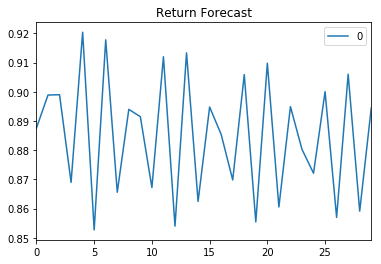

In [51]:
# Visualize the forecast
pd.DataFrame(results.forecast(steps=30)[0]).plot(title="Return Forecast")

## SARIMAX Model

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
# Create a SARIMAX model
model = SARIMAX(y_train,
                exog = X_train,
                order=(5, 1, 2),
               enforce_invertibility=False, enforce_stationarity=False)

In [53]:
# Fit the model to the data
results = model.fit()

In [54]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  430
Model:               SARIMAX(5, 1, 2)   Log Likelihood                1191.151
Date:                Mon, 24 Aug 2020   AIC                          -2364.302
Time:                        16:12:26   BIC                          -2327.855
Sample:                             0   HQIC                         -2349.902
                                - 430                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3384      9.138     -0.037      0.970     -18.248      17.571
ar.L1          0.0245      1.878      0.013      0.990      -3.656       3.705
ar.L2          0.2606      1.195      0.218      0.827      -2.081       2.603
ar.L3          0.1325      0.497      0.267      0.790      -0.841       1.106
ar.L4         -0.0879      0.527     -0.167      0.868      -1.122       0.946
ar.L5          0.0357      0.125      0.286      0.775      -0.209       0.280
ma.L1          0.0060      9.116      0.001      0.999     -17.861      17.873
ma.L2         -0.0710      3.893     -0.018      0.985      -7.702       7.560
sigma2         0.0002   9.49e-06     22.390      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       38.69   Jarque-Bera (JB):              4113.88
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
train_size = len(X_train)
test_size = len(X_test)
predictions= results.predict(start =train_size, end=train_size+test_size-1,exog=X_test)

In [58]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
# predictions.index=X_test.index
# predictions['Actual'] = act['Stock Price next day']
# predictions.rename(columns={0:'Pred'}, inplace=True)

RangeIndex(start=0, stop=108, step=1)